<a href="https://colab.research.google.com/github/PProsper/3600ID_ML/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Galaxy Target Feature/Spectra Analysis with KNN

In this notebook the target features of steller mass, cosmic dust average, galaxy age, and tau are both predicted from wavelength spectra. The predictions are then scaled using Robust scaler. Finally in a n effort to improve cross validation and R2 scores, the predicted target features are added to the spectra dataframe to predict for the next target features. 



##Author: Patrice Prosper
####Contributors: Jesenia Fuentes, Ognila Biswas
####Peer Leader:Jerry Muzisk 
####Mentors: Dr. Vivian Acquaviva, Henry Best


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics 
%matplotlib inline
from sklearn import linear_model
from numpy import linalg as la
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import files

##First we pull in the data

In [ ]:
props = pd.read_csv('GalaxyProperties.csv', sep = ',')
spectra = pd.read_csv('spectra.csv', sep = ',')
specs = pd.read_excel('spectra.xlsx')
wave = pd.read_csv('wavelengths.csv', sep = ',', header= None)

In [ ]:
props.shape

(1000, 5)

In [ ]:
props.head(1)

,Unnamed: 0,dust_av,age,mass,tauGyr
0,0,0.164869,0.203291,7.885367,0.033035


In [ ]:
spectra.shape

(1000, 1)

In [ ]:
spectra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   head    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
specs.shape

(1000, 850)

In [ ]:
specs.loc[0:1].values

array([[0.010532 , 0.0118543, 0.0114774, ..., 0.0235315, 0.0235232,
        0.0235604],
       [0.0122055, 0.0134793, 0.0133496, ..., 0.0439096, 0.0435937,
        0.0437942]])

In [ ]:
wave.shape

(850, 1)

#####It was tricky using the spectra csv, which contained all 850 features for each sprectrum in one cell for the 1000 galaxies. So the data had to be comma seperated in excel and the excel file is used instead of the csv for the spectra points only.

##Now the three galaxy spectra features are ploted against the wavelength stpectrum. The galaxies with minimum, maximum and median valued wavelength magnitudes are used for the plot.

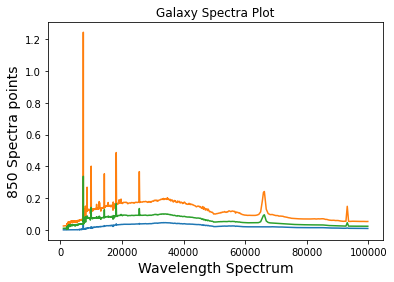

In [ ]:
plt.figure()
plt.title('Galaxy Spectra Plot')
plt.xlabel('Wavelength Spectrum' , fontsize=14)
plt.ylabel('850 Spectra points',fontsize=14)
x = wave.values
y = specs.loc[500,:].values
plt.plot(x, y)
y2 = specs.loc[998,:].values
plt.plot(x, y2)
y3 = specs.loc[0,:].values
plt.plot(x, y3)

In [ ]:
mass = props['mass']
dust_avs = props['dust_av']
age = props['age']
tau = props['tauGyr']

##Each target feature column form the properties csv is concated with the excel columns of the spectra features to create 4 different dataframes.

In [ ]:
df_mass = pd.concat([mass,specs], axis=1, sort =False) 
df_dust = pd.concat([dust_avs,specs], axis=1, sort =False) 
df_age = pd.concat([age,specs], axis=1, sort =False) 
df_tau = pd.concat([tau,specs], axis=1, sort =False) 
#used specs which is the excel comma seperated version of the spectra csv
#the cross val function was considering each row of the single column in the spectra csv as a string rather than 850 seperate floats

In [ ]:
df_mass.head(1)

,mass,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,...,Column811,Column812,Column813,Column814,Column815,Column816,Column817,Column818,Column819,Column820,Column821,Column822,Column823,Column824,Column825,Column826,Column827,Column828,Column829,Column830,Column831,Column832,Column833,Column834,Column835,Column836,Column837,Column838,Column839,Column840,Column841,Column842,Column843,Column844,Column845,Column846,Column847,Column848,Column849,Column850
0,7.885367,0.010532,0.011854,0.011477,0.011186,0.010723,0.007781,0.003281,0.007836,0.008751,0.012667,0.014847,0.015355,0.014811,0.016711,0.01475,0.015961,0.015273,0.017341,0.010833,0.015473,0.018079,0.015602,0.017929,0.014516,0.01694,0.019523,0.016641,0.01594,0.021192,0.016716,0.019832,0.020512,0.01835,0.019752,0.017349,0.017545,0.017032,0.018222,0.016267,...,0.031589,0.031717,0.031447,0.031581,0.031534,0.031419,0.030583,0.029491,0.029499,0.028562,0.02784,0.027534,0.026948,0.026983,0.026767,0.026105,0.026277,0.026052,0.025344,0.025126,0.024816,0.024368,0.024672,0.024484,0.045736,0.024255,0.024077,0.024201,0.024306,0.024166,0.024035,0.02381,0.024046,0.023865,0.023751,0.02378,0.0237,0.023532,0.023523,0.02356


In [ ]:
LearningSetdust = df_dust

In [ ]:
LearningSetmass = df_mass

In [ ]:
LearningSetage = df_age

In [ ]:
LearningSettau = df_tau

##Time to build a model and train our machine to predict each target feature 

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold,cross_val_score, cross_val_predict, GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.preprocessing import StandardScaler as sc , RobustScaler as rb

In [ ]:
X1 = df_dust.iloc[:,1:]
Y1 = df_dust.iloc[:, :1] 
X1train, X1test, Y1train, Y1test = train_test_split(X1, Y1,test_size=0.2) 

In [ ]:
X2 = df_mass.iloc[:,1:]
Y2 = df_mass.iloc[:, :1] 
X2train, X2test, Y2train, Y2test = train_test_split(X2, Y2,test_size=0.2) 

In [ ]:
X3 = df_age.iloc[:,1:]
Y3 = df_age.iloc[:, :1] 
X3train, X3test, Y3train, Y3test = train_test_split(X3, Y3,test_size=0.2) 

In [ ]:
X4 = df_tau.iloc[:,1:]
Y4 = df_tau.iloc[:, :1] 
X4train, X4test, Y4train, Y4test = train_test_split(X4, Y4,test_size=0.2) 

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
X1train.shape


(800, 850)

In [ ]:
Y1train.shape

(800, 1)

In [ ]:
print(X1train.iloc[:5,0:])

      Column1   Column2   Column3  ...  Column848  Column849  Column850
512  0.031547  0.034641  0.034384  ...   0.035486   0.035164   0.035189
532  0.200141  0.218723  0.217816  ...   0.182028   0.179826   0.179699
299  0.021569  0.023692  0.023513  ...   0.066003   0.064889   0.065068
622  0.004469  0.004917  0.004888  ...   0.015324   0.015170   0.015244
886  0.134851  0.147749  0.146851  ...   0.057943   0.057680   0.057429

[5 rows x 850 columns]


In [ ]:
print(Y1train.iloc[:5,:1])

      dust_av
512  0.041403
532  0.001000
299  0.053051
622  0.195803
886  0.001000


##All Scores per 5fold are tested and R2 scores are assed 

In [ ]:
scores1 = cross_val_score(model, X = X1train, y = Y1train, cv=5)
scores2 = cross_val_score(model, X = X2train, y = Y2train, cv=5)
scores3 = cross_val_score(model, X = X3train, y = Y3train, cv=5)
scores4 = cross_val_score(model, X = X4train, y = Y4train, cv=5)
#could not use Xtrain and Ytrain as parameters, had to use the cross_val_score built in param names X and y
#removed the scoring parameter so that it defaluted to R2, unable to use accuracy as a scoring method as discused in class

In [ ]:
print('Initial dust score', scores1)
print('Initial mass score', scores2)
print('Initial age score', scores3)
print('Initial tau score', scores4)
#scores at random_state = 4 are array([0.66491124, 0.59952558, 0.74219485, 0.66313659, 0.52453145])
#scores at test_size= 0.2 and random_state = 5 are array([0.64348629, 0.76861964, 0.64540519, 0.64817706, 0.78061009])

Initial dust score [0.81165417 0.6444057  0.6996748  0.76680562 0.77285419]
Initial mass score [0.95041124 0.96801207 0.96475742 0.95151197 0.96481805]
Initial age score [ 0.34760034  0.24277473  0.15998674  0.28688634 -0.05113709]
Initial tau score [-0.05421851  0.05836256  0.01834784 -0.33094303 -0.11320138]


In [ ]:
ypred_dust = cross_val_predict(model, X1, Y1, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
ypred_mass = cross_val_predict(model, X2, Y2, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
ypred_age = cross_val_predict(model, X3, Y3, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
ypred_tau = cross_val_predict(model, X4, Y4, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
ypred_mass.shape

(1000, 1)

In [ ]:
print('R2 dust, 1st Pass' , r2(Y1, ypred_dust))
print('R2 mass, 1st Pass' , r2(Y2, ypred_mass))
print('R2 age, 1st Pass' ,r2(Y3, ypred_age))
print('R2 tau, 1st Pass' , r2(Y4, ypred_tau))

R2 dust, 1st Pass 0.7379183972293396
R2 mass, 1st Pass 0.9650605199039957
R2 age, 1st Pass 0.32122788891774645
R2 tau, 1st Pass -0.041406796713423955


##The True values vs. Predictions values are ploted for each target feature 

(-0.14133220740186403,
 2.9749644638526984,
 -0.0852305533004701,
 3.0310661179540923)

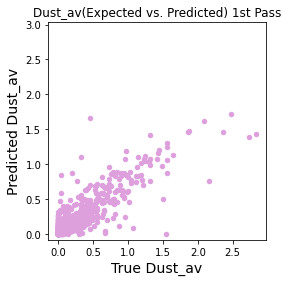

In [ ]:
plt.scatter(Y1, ypred_dust, s = 20, c = 'plum')
plt.title('Dust_av(True vs. Predicted) 1st Pass')
plt.xlabel('True Dust_av' , fontsize=14)
plt.ylabel('Predicted Dust_av',fontsize=14)
plt.axis('square')

(6.5, 10.5)

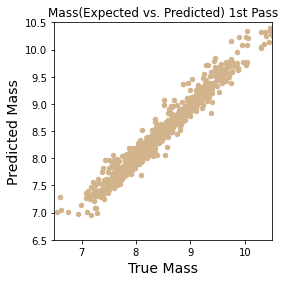

In [ ]:
plt.scatter(Y2.values, ypred_mass, s = 20, c = 'tan')
plt.title('Mass(True vs. Predicted) 1st Pass')
plt.xlabel('True Mass' , fontsize=14)
plt.ylabel('Predicted Mass',fontsize=14)
plt.axis('square')
plt.xlim(6.5,10.5)
plt.ylim(6.5,10.5)

In [ ]:
#print(ypred_mass)

(-0.19651189335836516,
 5.247057919625824,
 -0.05293283879054125,
 5.390636974193648)

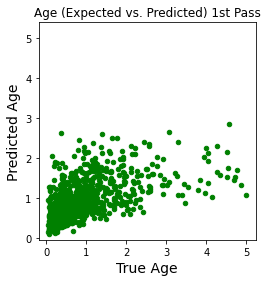

In [ ]:
plt.scatter(Y3,ypred_age, s = 20, c = 'green')
plt.title('Age (True vs. Predicted) 1st Pass')
plt.xlabel('True Age' , fontsize=14)
plt.ylabel('Predicted Age',fontsize=14)
plt.axis('square')

(-0.4849681081518977,
 10.404613864751978,
 -0.23794733513984045,
 10.651634637764037)

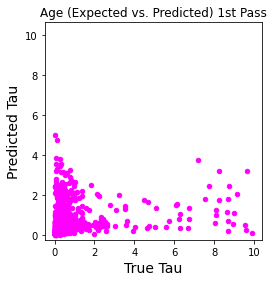

In [ ]:
plt.scatter(Y4,ypred_tau, s = 20, c = 'magenta')
plt.title('Age (True vs. Predicted) 1st Pass')
plt.xlabel('True Tau' , fontsize=14)
plt.ylabel('Predicted Tau',fontsize=14)
plt.axis('square')

###The predictions for stellar mass are very close to accurate
###The predictionas for dust_av needs improvement. The plot seems follow a  linear pattern but not quite.
###The predictions for age and tau are way off and their plots show a lot of outliers.

##Rescaling using robust scaler 

In [ ]:
scaler = sklearn.preprocessing.RobustScaler()

In [ ]:
scaler.fit(X1)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [ ]:
scaler.fit(X3)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [ ]:
scaler.fit(X4)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [ ]:
scaledX1 = scaler.transform(X1)

In [ ]:
scaledX3 = scaler.transform(X3)

In [ ]:
scaledX4 = scaler.transform(X4)

In [ ]:
ypred_dust_rob = cross_val_predict(model,scaledX1 , Y1, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
ypred_age_rob = cross_val_predict(model,scaledX3 , Y3, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
ypred_tau_rob = cross_val_predict(model,scaledX4 , Y4, cv = KFold(n_splits=5, shuffle=True))

##Scores and R2 scores are looker better

In [ ]:
print('R2 dust, 2nd Pass' , r2(Y1, ypred_dust_rob))
print('R2 dust, 1st Pass' , r2(Y1, ypred_dust))
print('R2 age, 2nd Pass' ,r2(Y3, ypred_age_rob))
print('R2 age, 1st Pass' ,r2(Y3, ypred_age))
print('R2 tau, 2nd Pass' , r2(Y4, ypred_tau_rob))
print('R2 tau, 1st Pass' , r2(Y4, ypred_tau))

R2 dust, 2nd Pass 0.7502355963782337
R2 dust, 1st Pass 0.7379183972293396
R2 age, 2nd Pass 0.3250438557910307
R2 age, 1st Pass 0.32122788891774645
R2 tau, 2nd Pass -0.043338765384293376
R2 tau, 1st Pass -0.041406796713423955


In [ ]:
scores1_rob = cross_val_score(model, X = scaledX1, y = Y1, cv = KFold(n_splits=5, shuffle=True))
print('robust dust score', scores1_rob)
print('initial dust score', scores1)

robust dust score [0.74724492 0.78813781 0.81269223 0.71524483 0.73945109]
initial dust score [0.81165417 0.6444057  0.6996748  0.76680562 0.77285419]


In [ ]:
scores3_rob = cross_val_score(model, X = scaledX3, y = Y3, cv = KFold(n_splits=5, shuffle=True))
print('robust age score', scores3)
print('initial age score',scores3_rob)
#scores4_rob = cross_val_score(model, X = X4train, y = Y4train, cv=5)

robust age score [ 0.34760034  0.24277473  0.15998674  0.28688634 -0.05113709]
initial age score [0.36997454 0.35116582 0.32853937 0.32537623 0.4387119 ]


In [ ]:
scores4_rob = cross_val_score(model, X = scaledX4, y = Y4, cv = KFold(n_splits=5, shuffle=True))
print('robust tau score',scores4)
print('initial tau score',scores4_rob)

robust tau score [-0.05421851  0.05836256  0.01834784 -0.33094303 -0.11320138]
initial tau score [-0.00712024 -0.07027395 -0.04112905 -0.01930043 -0.06182254]


#Reploting using scaled predictions

(-0.14133220740186403,
 2.9749644638526984,
 -0.08881301129562008,
 3.0274836599589423)

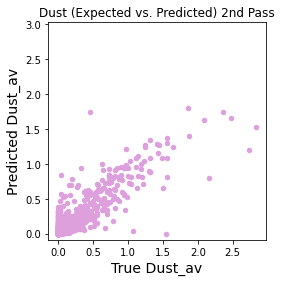

In [ ]:
plt.scatter(Y1, ypred_dust_rob, s = 20, c = 'plum')
plt.title('Dust (True vs. Predicted) 2nd Pass')
plt.xlabel('True Dust_av' , fontsize=14)
plt.ylabel('Predicted Dust_av',fontsize=14)
plt.axis('square')

(-0.19651189335836516,
 5.247057919625824,
 -0.05807105432262094,
 5.385498758661568)

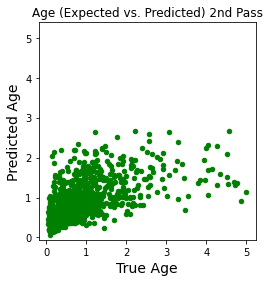

In [ ]:
plt.scatter(Y3,ypred_age_rob, s = 20, c = 'green')
plt.title('Age (True vs. Predicted) 2nd Pass')
plt.xlabel('True Age' , fontsize=14)
plt.ylabel('Predicted Age',fontsize=14)
plt.axis('square')

(-0.4849681081518977,
 10.404613864751978,
 -0.1920197670327013,
 10.697562205871176)

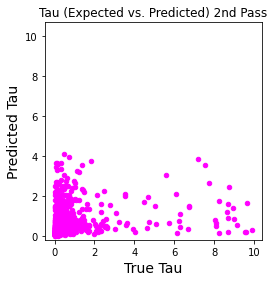

In [ ]:
plt.scatter(Y4,ypred_tau_rob, s = 20, c = 'magenta')
plt.title('Tau (True vs. Predicted) 2nd Pass')
plt.xlabel('True Tau' , fontsize=14)
plt.ylabel('Predicted Tau',fontsize=14)
plt.axis('square')

#Scafolding target teature tredictions in to dtaframe for improved accuracy 

###First the original predictions for mass are converted into a pandas dataframe and then output to an excel file.

In [ ]:
mass_pred = pd.DataFrame(data=ypred_mass[0:,0:1]) 

In [ ]:
mass_pred.reset_index(drop=True, inplace=True)
mass_pred

,0
0,8.075701
1,8.344712
2,8.040013
3,8.315747
4,8.321264
...,...
995,8.859929
996,7.929756
997,8.368792
998,8.295365


In [ ]:
mass_pred.to_excel("mass_pred.xlsx") 
pred_mass=pd.read_excel('mass_pred.xlsx')

###The mass predictions are concated to the spectra dataframe

In [ ]:
df_mass_pred = pd.concat([dust_avs,pred_mass.iloc[:,1:],specs], ignore_index= True, axis=1,sort =False)

In [ ]:
df_mass_pred.head

<bound method NDFrame.head of           0         1         2    ...       849       850       851
0    0.164869  8.075701  0.010532  ...  0.023532  0.023523  0.023560
1    0.200852  8.344712  0.012205  ...  0.043910  0.043594  0.043794
2    0.197863  8.040013  0.003660  ...  0.015475  0.015348  0.015374
3    0.001000  8.315747  0.065447  ...  0.049791  0.049233  0.049177
4    0.001000  8.321264  0.143073  ...  0.068354  0.067859  0.067661
..        ...       ...       ...  ...       ...       ...       ...
995  0.322905  8.859929  0.084785  ...  0.234346  0.233746  0.235702
996  0.870794  7.929756  0.014452  ...  0.126414  0.128591  0.131057
997  0.001000  8.368792  0.153889  ...  0.073292  0.072723  0.072523
998  0.232163  8.295365  0.025145  ...  0.053276  0.053137  0.053471
999  0.456984  8.261507  0.046592  ...  0.125763  0.127002  0.128654

[1000 rows x 852 columns]>

In [ ]:
LearningSet2 = df_mass_pred

In [ ]:
df_mass_pred.shape

(1000, 852)

###With a new dataframe containing the mass feature column, we build new predictions for dust averages, age and tau.

In [ ]:
X1_2 = df_mass_pred.iloc[:,1:]
Y1_2 = df_mass_pred.iloc[:, :1] 
X1_2train, X1_2test, Y1_2train, Y1_2test = train_test_split(X1_2, Y1_2,test_size=0.2) 

In [ ]:
scores1_2 = cross_val_score(model, X = X1_2train, y = Y1_2train, cv=5)
print('dust scores, 3rd Pass', scores1_2)
print('dust scores, robust',scores1_rob)
print('dust scores, initial',scores1)

dust scores, 3rd Pass [0.75533017 0.60541708 0.76002131 0.6426521  0.68574661]
dust scores, robust [0.74724492 0.78813781 0.81269223 0.71524483 0.73945109]
dust scores, initial [0.81165417 0.6444057  0.6996748  0.76680562 0.77285419]


In [ ]:
ypred_dust3 = cross_val_predict(model, X1_2, Y1_2, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
print('R2 dust, 3rd Pass',r2(Y1_2, ypred_dust3))
print('R2 dust, 2nd Pass' , r2(Y1, ypred_dust_rob))
print('R2 dust, 1st Pass' , r2(Y1, ypred_dust))

R2 dust, 3rd Pass 0.7331830130219572
R2 dust, 2nd Pass 0.7502355963782337
R2 dust, 1st Pass 0.7379183972293396


In [ ]:
df_mass_pred2 = pd.concat([age,pred_mass.iloc[:,1:],specs], ignore_index= True, axis=1,sort =False)

In [ ]:
X3_2 = df_mass_pred2.iloc[:,1:]
Y3_2 = df_mass_pred2.iloc[:, :1] 
X3_2train, X3_2test, Y3_2train, Y3_2test = train_test_split(X3_2, Y3_2,test_size=0.2)

In [ ]:
scores3_2 = cross_val_score(model, X = X3_2train, y = Y3_2train, cv=5)
print('Age scores, 3rd Pass',scores3_2)
print('Age scores, robust',scores3_rob)
print('Age scores,  initial',scores3)

Age scores, 3rd Pass [0.30126213 0.28084154 0.14076098 0.22809007 0.38100882]
Age scores, robust [0.36997454 0.35116582 0.32853937 0.32537623 0.4387119 ]
Age scores,  initial [ 0.34760034  0.24277473  0.15998674  0.28688634 -0.05113709]


In [ ]:
ypred_age3 = cross_val_predict(model, X3_2, Y3_2, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
print('R2 age, 3rd Pass' ,r2(Y3_2, ypred_age3))
print('R2 age, 2nd Pass' , r2(Y3, ypred_age_rob))
print('R2 age, 1st Pass' , r2(Y3, ypred_age))

R2 age, 3rd Pass 0.33532761905990593
R2 age, 2nd Pass 0.3250438557910307
R2 age, 1st Pass 0.32122788891774645


In [ ]:
df_mass_pred3 = pd.concat([tau,pred_mass.iloc[:,1:],specs], ignore_index= True, axis=1,sort =False)

In [ ]:
X4_2 = df_mass_pred2.iloc[:,1:]
Y4_2 = df_mass_pred2.iloc[:, :1] 
X4_2train, X4_2test, Y4_2train, Y4_2test = train_test_split(X4_2, Y4_2,test_size=0.2)

In [ ]:
scores4_2 = cross_val_score(model, X = X4_2train, y = Y4_2train, cv=5)
print('Tau scores, 3rd Pass',scores4_2)
print('Tau scores, 2nd Pass',scores4_rob)
print('Tau scores,  initial',scores4)

Tau scores, 3rd Pass [0.29534629 0.35881124 0.34571712 0.34484461 0.3224191 ]
Tau scores, 2nd Pass [-0.00712024 -0.07027395 -0.04112905 -0.01930043 -0.06182254]
Tau scores,  initial [-0.05421851  0.05836256  0.01834784 -0.33094303 -0.11320138]


In [ ]:
ypred_tau3 = cross_val_predict(model, X3_2, Y3_2, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
print('R2 tau, 3rd Pass' ,r2(Y4_2, ypred_tau3))
print('R2 tau, 2nd Pass' , r2(Y4, ypred_tau_rob))
print('R2 tau, 1st Pass' , r2(Y4, ypred_tau))

R2 tau, 3rd Pass 0.31432491369341575
R2 tau, 2nd Pass -0.043338765384293376
R2 tau, 1st Pass -0.041406796713423955


###With better looking scores and predictions, new accuracy plots are made for dust averages, age and tau.

(-0.14133220740186403,
 2.9749644638526984,
 -0.10019598943202038,
 3.0161006818225418)

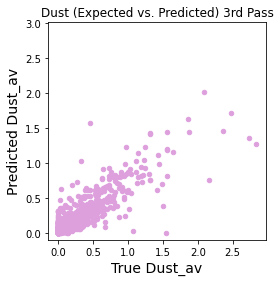

In [ ]:
plt.scatter(Y1_2, ypred_dust3, s = 20, c = 'plum')
plt.title('Dust (True vs. Predicted) 3rd Pass')
plt.xlabel('True Dust_av' , fontsize=14)
plt.ylabel('Predicted Dust_av',fontsize=14)
plt.axis('square')

(-0.19651189335836516,
 5.247057919625824,
 -0.06365387767744876,
 5.379915935306741)

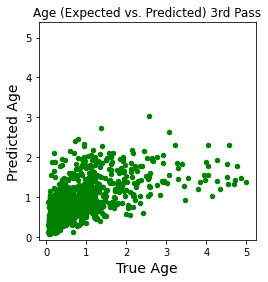

In [ ]:
plt.scatter(Y3_2, ypred_age3, s = 20, c = 'green')
plt.title('Age (True vs. Predicted) 3rd Pass')
plt.xlabel('True Age' , fontsize=14)
plt.ylabel('Predicted Age',fontsize=14)
plt.axis('square')

(-0.19651189335836516,
 5.247057919625824,
 -0.040449327205344526,
 5.403120485778845)

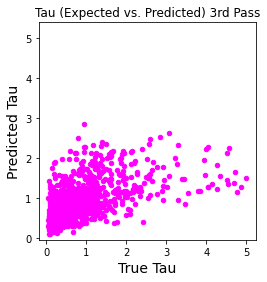

In [ ]:
plt.scatter(Y4_2, ypred_tau3, s = 20, c = 'magenta')
plt.title('Tau (True vs. Predicted) 3rd Pass')
plt.xlabel('True Tau' , fontsize=14)
plt.ylabel('Predicted Tau',fontsize=14)
plt.axis('square')

#Scafolding both predicted dust averages and steller mass to spectra dataframe.

###This third learning set will be used for better predictions of age and tau. 

In [ ]:
dust_predr = pd.DataFrame(data=ypred_dust_rob[0:,0:1]) 
age_pred = pd.DataFrame(data=ypred_age[0:,0:1]) 
tau_pred = pd.DataFrame(data=ypred_tau[0:,0:1]) 

In [ ]:
dust_predr.reset_index(drop=True, inplace=True)
age_pred.reset_index(drop=True, inplace=True)
tau_pred.reset_index(drop=True, inplace=True)

In [ ]:
dust_predr.to_excel("dust_pred_rob.xlsx") 
dust_predr =pd.read_excel('dust_pred_rob.xlsx')
age_pred.to_excel("age_pred.xlsx") 
age_pred =pd.read_excel('age_pred.xlsx')
tau_pred.to_excel("tau_pred.xlsx") 
tau_pred =pd.read_excel('tau_pred.xlsx')

In [ ]:
df_mass_dust_pred = pd.concat([ age_pred.iloc[:,1:],dust_predr.iloc[:,1:],pred_mass.iloc[:,1:],specs], ignore_index= True, axis=1,sort =False)

In [ ]:
df_mass_dust_pred.head

<bound method NDFrame.head of           0         1         2    ...       850       851       852
0    0.500893  0.157452  8.075701  ...  0.023532  0.023523  0.023560
1    0.908100  0.051851  8.344712  ...  0.043910  0.043594  0.043794
2    2.114373  0.211950  8.040013  ...  0.015475  0.015348  0.015374
3    0.591781  0.015622  8.315747  ...  0.049791  0.049233  0.049177
4    0.559980  0.013777  8.321264  ...  0.068354  0.067859  0.067661
..        ...       ...       ...  ...       ...       ...       ...
995  0.689974  0.356280  8.859929  ...  0.234346  0.233746  0.235702
996  0.203638  0.785045  7.929756  ...  0.126414  0.128591  0.131057
997  0.547714  0.006934  8.368792  ...  0.073292  0.072723  0.072523
998  1.019675  0.183786  8.295365  ...  0.053276  0.053137  0.053471
999  0.404136  0.425458  8.261507  ...  0.125763  0.127002  0.128654

[1000 rows x 853 columns]>

In [ ]:
LearningSet3 = df_mass_dust_pred

In [ ]:
X3_3 = df_mass_dust_pred.iloc[:,1:]
Y3_3 = df_mass_dust_pred.iloc[:, :1] 
X3_3train, X3_3test, Y3_3train, Y3_3test = train_test_split(X3_3, Y3_3,test_size=0.2) 

###The new scores for age and tau are compared to the first two sets and are looking much better.

In [ ]:
scores3_3 = cross_val_score(model, X = X3_3train, y = Y3_3train, cv=5)
print('Age scores, 4th Pass',scores3_3)
print('Age scores, 3rd Pass',scores3_2)
print('Age scores, 2nd Pass',scores3_rob)
print('Age scores, 1st Pass',scores3)

Age scores, 4th Pass [0.71375536 0.67091576 0.63883108 0.70639509 0.69616279]
Age scores, 3rd Pass [0.30126213 0.28084154 0.14076098 0.22809007 0.38100882]
Age scores, 2nd Pass [0.36997454 0.35116582 0.32853937 0.32537623 0.4387119 ]
Age scores, 3rd Pass [ 0.34760034  0.24277473  0.15998674  0.28688634 -0.05113709]


In [ ]:
ypred_age4 = cross_val_predict(model, X3_3, Y3_3, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
print('R2 age, 4th Pass' ,r2(Y3_3, ypred_age4))
print('R2 age, 3rd Pass' ,r2(Y3_2, ypred_age3))
print('R2 age, 2nd Pass' , r2(Y3, ypred_age_rob))
print('R2 age, 1st Pass' , r2(Y3, ypred_age))

R2 age, 4th Pass 0.7289077142930063
R2 age, 3rd Pass 0.33532761905990593
R2 age, 2nd Pass 0.3250438557910307
R2 age, 1st Pass 0.32122788891774645


In [ ]:
df_mass_dust_pred2 = pd.concat([tau_pred.iloc[:,1:],dust_predr.iloc[:,1:],pred_mass.iloc[:,1:],specs], ignore_index= True, axis=1,sort =False)

In [ ]:
X4_2 = df_mass_dust_pred2.iloc[:,1:]
Y4_2 = df_mass_dust_pred2.iloc[:, :1] 
X4_2train, X4_2test, Y4_2train, Y4_2test = train_test_split(X4_2, Y4_2,test_size=0.2) 

In [ ]:
scores4_3 = cross_val_score(model, X = X4_3train, y = Y4_3train, cv=5)
print('Tau scores, 4th Pass',scores4_3)
print('Tau scores, 3rd Pass',scores4_2)
print('Tau scores, 2nd Pass', scores4_rob)
print('Tau scores, 1st Pass',scores4)

Tau scores, 4th Pass [0.49129071 0.45011454 0.50107111 0.60559366 0.46970312]
Tau scores, 3rd Pass [0.29534629 0.35881124 0.34571712 0.34484461 0.3224191 ]
Tau scores, 2nd Pass [-0.00712024 -0.07027395 -0.04112905 -0.01930043 -0.06182254]
Tau scores, 1st Pass [-0.05421851  0.05836256  0.01834784 -0.33094303 -0.11320138]


In [ ]:
ypred_tau4 = cross_val_predict(model, X4_3, Y4_3, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
print('R2 tau, 4th Pass' ,r2(Y4_3, ypred_tau4))
print('R2 tau, 3rd Pass' ,r2(Y4_2, ypred_tau3))
print('R2 tau, 2nd Pass' , r2(Y4, ypred_tau_rob))
print('R2 tau, 1st Pass' , r2(Y4, ypred_tau))

R2 tau, 4th Pass 0.47705693186547804
R2 tau, 3rd Pass -0.3232995602304778
R2 tau, 2nd Pass -0.043338765384293376
R2 tau, 1st Pass -0.041406796713423955


###The new plots show that the new predictions are closer to the true values.

(-0.052932838790541226,
 2.977656035943736,
 0.12721397342665017,
 3.1578028481609275)

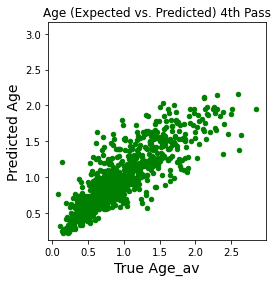

In [ ]:
plt.scatter(Y3_3, ypred_age4, s = 20, c = 'green')
plt.title('Age (True vs. Predicted) 4th Pass')
plt.xlabel('True Age_av' , fontsize=14)
plt.ylabel('Predicted Age',fontsize=14)
plt.axis('square')

(-0.23743841540491692,
 5.278305801047152,
 -0.14075476140871807,
 5.374989455043351)

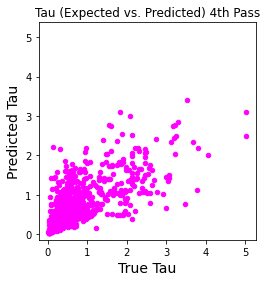

In [ ]:
plt.scatter(Y4_3,ypred_tau4, s = 20, c = 'magenta')
plt.title('Tau (True vs. Predicted) 4th Pass')
plt.xlabel('True Tau' , fontsize=14)
plt.ylabel('Predicted Tau',fontsize=14)
plt.axis('square')

#Scafolding all three predicted target features of steller mass, dust average and age to improve the tau prediction. 

In [ ]:
df_mass_dust_age_pred = pd.concat([tau_pred.iloc[:,1:],age_pred.iloc[:,1:],dust_predr.iloc[:,1:],pred_mass.iloc[:,1:],specs], ignore_index= True, axis=1,sort =False)

In [ ]:
df_mass_dust_age_pred.head

<bound method NDFrame.head of           0         1         2    ...       851       852       853
0    0.099917  0.500893  0.157452  ...  0.023532  0.023523  0.023560
1    0.122994  0.908100  0.051851  ...  0.043910  0.043594  0.043794
2    0.467589  2.114373  0.211950  ...  0.015475  0.015348  0.015374
3    0.268155  0.591781  0.015622  ...  0.049791  0.049233  0.049177
4    0.316997  0.559980  0.013777  ...  0.068354  0.067859  0.067661
..        ...       ...       ...  ...       ...       ...       ...
995  0.379192  0.689974  0.356280  ...  0.234346  0.233746  0.235702
996  1.458494  0.203638  0.785045  ...  0.126414  0.128591  0.131057
997  0.865535  0.547714  0.006934  ...  0.073292  0.072723  0.072523
998  1.947167  1.019675  0.183786  ...  0.053276  0.053137  0.053471
999  1.328402  0.404136  0.425458  ...  0.125763  0.127002  0.128654

[1000 rows x 854 columns]>

In [ ]:
LearningSet4 = df_mass_dust_age_pred

In [ ]:
X4_4 = df_mass_dust_age_pred.iloc[:,1:]
Y4_4 = df_mass_dust_age_pred.iloc[:, :1] 
X4_4train, X4_3test, Y4_4train, Y4_4test = train_test_split(X4_4, Y4_4,test_size=0.2) 

###The scores look slightly better.

In [ ]:
scores4_4 = cross_val_score(model, X = X4_4train, y = Y4_4train, cv=5)
print('Tau scores, 5th Pass',scores4_4)
print('Tau scores, 4th Pass',scores4_3)
print('Tau scores, 3rd Pass',scores4_2)
print('Tau scores, 2nd Pass',scores4_rob)
print('Tau scores, 1st Pass',scores4)

[0.58380006 0.42647798 0.50209603 0.36865523 0.50354561]
[0.49129071 0.45011454 0.50107111 0.60559366 0.46970312]
[0.29534629 0.35881124 0.34571712 0.34484461 0.3224191 ]
[-0.00712024 -0.07027395 -0.04112905 -0.01930043 -0.06182254]
[-0.05421851  0.05836256  0.01834784 -0.33094303 -0.11320138]


In [ ]:
ypred_tau5 = cross_val_predict(model, X4_4, Y4_4, cv = KFold(n_splits=5, shuffle=True))

In [ ]:
print('R2 tau, 4th Pass' ,r2(Y4_4, ypred_tau4))
print('R2 tau, 4th Pass' ,r2(Y4_3, ypred_tau4))
print('R2 tau, 3rd Pass' ,r2(Y4_2, ypred_tau3))
print('R2 tau, 2nd Pass' , r2(Y4, ypred_tau_rob))
print('R2 tau, 1st Pass' , r2(Y4, ypred_tau))

R2 tau, 4th Pass 0.525192107020621
R2 tau, 4th Pass 0.47705693186547804
R2 tau, 3rd Pass -0.3232995602304778
R2 tau, 2nd Pass -0.043338765384293376
R2 tau, 1st Pass -0.041406796713423955


###There is not much change to the plot of the fifth  prediction set of tau.

(-0.23794733513984045,
 5.284186888651191,
 -0.1416226064421513,
 5.38051161734888)

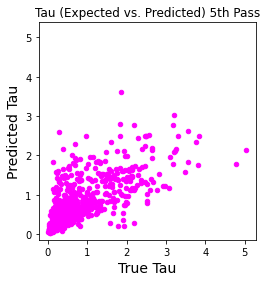

In [ ]:
plt.scatter(Y4_4,ypred_tau4, s = 20, c = 'magenta')
plt.title('Tau (True vs. Predicted) 5th Pass')
plt.xlabel('True Tau' , fontsize=14)
plt.ylabel('Predicted Tau',fontsize=14)
plt.axis('square')

##Resources:

####https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

####https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

####https://scikit-learn.org/stable/modules/model_evaluation.html

####https://stackoverflow.com/questions/32801806/pandas-concat-ignore-index-doesnt-work

####https://youtu.be/yPVQZZmheCg

####https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html

####https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/

####https://stackoverflow.com/questions/46411507/get-corresponding-index-of-median

####https://python4astronomers.github.io/core/numpy_scipy.html